# Project name : Sentiment analysis on Electricity tweets in India and UK

### Business problem <br />

In today’s digital landscape, companies and policymakers need to understand public sentiment about key issues to make informed decisions. <br />
This project addresses the challenge of analyzing and interpreting public sentiment regarding electricity-related topics in India and the UK. By leveraging sentiment analysis on tweets, businesses and governments can gain valuable insights into consumer and citizen opinions on electricity prices, policies, and service quality. <br />
#### Goal of the project
The goal is to evaluate the performance of various machine learning models—Decision Tree, Random Forest, Logistic Regression, and Naive Bayes—to accurately classify sentiments in tweets. <br /> 
Identifying the most effective model will help in understanding public sentiment trends, enabling more responsive and data-driven decision-making in the energy sector.

### Table of content


1. __<a href='#1' target='_self'>Import Libraries</a>__
1. __<a href='#2' target='_self'>Fetch Tweets & Sentiments</a>__
    1. __<a href='#2A' target='_self'>Fetch Tweets</a>__
        1. <a href='#2Ab' target='_self'>Using tweepy</a>
    1. __<a href='#2B' target='_self'>Fetch sentiments</a>__
        1. <a href='#2Ba' target='_self'>Using NLTK's SentimentIntensityAnalyzer</a>
1. __<a href='#3' target='_self'>Text Pre-processing</a>__
    1. __<a href='#3A' target='_self'>Pre-processing 'Key Words'</a>__
        1. <a href='#3Aa' target='_self'>Removing '@names'</a>
        1. <a href='#3Ab' target='_self'>Removing links (http | https)</a>
        1. <a href='#3Ac' target='_self'>Removing tweets with empty text</a>
        1. <a href='#3Ad' target='_self'>Dropping duplicate rows</a>
        1. <a href='#3Ae' target='_self'>Removing Punctuations, Numbers and Special characters</a>
        1. <a href='#3Af' target='_self'>Removing Stop words</a>
        1. <a href='#3Ag' target='_self'>Tokenizing</a>
        1. <a href='#3Ah' target='_self'>Converting words to Lemma </a>
        1. <a href='#3i' target='_self'>Joining all tokens into sentences</a>
    tweet</a>
1. __<a href='#4' target='_self'>Story Generation and Visualization</a>__
    1. __<a href='#4A' target='_self'>Most common words in positive tweets</a>__
    1. __<a href='#4B' target='_self'>Most common words in negative tweets</a>__
1. __<a href='#5' target='_self'>Feature Extraction</a>__
    1. __<a href='#5A' target='_self'>Feature Extraction for 'Key Words'</a>__
1. __<a href='#6' target='_self'>Model Building: Sentiment Analysis</a>__
    1. __<a href='#6A' target='_self'>Conversion</a>__
        1. <a href='#6Ab' target='_self'>TF-IDF word features</a>
    1. __<a href='#6A' target='_self'>Models</a>__
        1. <a href='#6Ab' target='_self'>Naive base</a>
        1. <a href='#6Ab' target='_self'>Decision tree </a>
        1. <a href='#6Ab' target='_self'>Random forest</a>
        1. <a href='#6Ab' target='_self'>Logistic regression</a>
    1. __<a href='#6A' target='_self'>Models Testing</a>__
        1. <a href='#6Ab' target='_self'>Confusion matrix</a>
        1. <a href='#6Ab' target='_self'>Accuracy</a>
        1. <a href='#6Ab' target='_self'>F1 score</a>
    1. __<a href='#6A' target='_self'>Models comparison</a>__
        1. <a href='#6Ab' target='_self'>ROC curve</a>
        
       

## <a id='1'>1. Import Libraries</a>

In [2]:
import numpy as np  # For numerical operations and array handling
import pandas as pd  # For data manipulation and analysis
import matplotlib.pyplot as plt  # For creating static, animated, and interactive visualizations
import seaborn as sns  # For statistical data visualization based on Matplotlib
import re  # For regular expression operations
import time  # For time-related functions
import string  # For string operations and constants
import warnings  # For managing warning messages

# For all NLP related operations on text

import nltk  # For natural language processing
from nltk.corpus import stopwords  # For accessing common stopwords
from nltk.tokenize import sent_tokenize, word_tokenize  # For tokenizing sentences and words
from nltk.sentiment.vader import SentimentIntensityAnalyzer  # For sentiment analysis using VADER
from nltk.stem import WordNetLemmatizer  # For lemmatization
from nltk.stem.porter import *  # For stemming (Porter stemmer)
from nltk.classify import NaiveBayesClassifier  # For Naive Bayes classification
from wordcloud import WordCloud  # For generating word clouds

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer  # For text feature extraction
from sklearn.linear_model import LogisticRegression  # For logistic regression model
from sklearn.model_selection import train_test_split  # For splitting datasets
from sklearn.metrics import f1_score, confusion_matrix, accuracy_score  # For model evaluation metrics
from sklearn.svm import SVC  # For Support Vector Classification
from sklearn.naive_bayes import GaussianNB  # For Gaussian Naive Bayes classification

# To consume Twitter's API

import tweepy  # For accessing Twitter API
from tweepy import OAuthHandler  # For OAuth authentication with Twitter API

# To identify the sentiment of text
from textblob import TextBlob  # For text processing and sentiment analysis
from textblob.sentiments import NaiveBayesAnalyzer  # For sentiment analysis using Naive Bayes
from textblob.np_extractors import ConllExtractor  # For noun phrase extraction

# Ignoring all the warnings

warnings.filterwarnings("ignore", category=DeprecationWarning)

import tensorflow as tf  # For machine learning and deep learning
from tensorflow import keras  # For high-level neural networks API
from keras import models  # For creating and training models
from keras import layers  # For adding layers to models
from keras.callbacks import EarlyStopping  # For stopping training early based on validation metrics

# Downloading stopwords corpus

nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('vader_lexicon')
nltk.download('averaged_perceptron_tagger')
nltk.download('movie_reviews')
nltk.download('punkt')
nltk.download('conll2000')
nltk.download('brown')
stopwords = set(stopwords.words("english"))

# For showing all the plots inline in Jupyter notebooks
%matplotlib inline

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package movie_reviews to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[

## <a id='2'>2. Fetch Tweets & Sentiments</a>
### <a id='2A'>A. Fetch Tweets</a>
Fetch from twitter API using 'tweepy' <br/>
I will use tweepy library to extract the twitter tweets.<br/>
This code initializes the authentication process for accessing the Twitter API using tweepy. It requires four keys/tokens (consumer key, consumer secret, access token, access token secret) from the Twitter Developer Console. 

In [2]:
# keys and tokens from the Twitter Dev Console
consumer_key = 'Eh0sTdxflRe7BEW8lYc44RFI9'
consumer_secret = 'J07smZmzHp04WrSSMMtenqqJ6IhlKIJjJWzJKw8xLoxG0s'
access_token = '2860698043-ITWJDIGiPDBST5cjda57Yu5xUVJZDOg7Hkf'
access_token_secret = 'k3l99PlOKKyGlE0TLBjBYtLkbh5etqqg8XpmREVgQi'

The tweepy.API() method is used to establish a connection to the API, with the wait_on_rate_limit parameter ensuring that the script respects Twitter's rate limits.

In [3]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, wait_on_rate_limit=True)

This chunk initializes two empty pandas DataFrames, df_uk and df_india, which will store tweets from the UK and India, respectively. list_hash defines the search terms (hashtags) related to electricity and energy prices. <br /> <br /> The geocode_uk and geocode_india variables specify geographic locations for filtering tweets by proximity.

In [4]:
df_uk= pd.DataFrame()
df_india= pd.DataFrame()
list_hash=["Electricity,Electricity prices,Electricity bill,Energy prices,Energy bill"] 
geocode_uk= "54.073010,-2.077244,500km"
geocode_india="24.520258,79.172388,2000km"

This function, Tweets_extractor, uses tweepy to fetch tweets based on search terms (search_words) and location (geocode).

In [9]:
# Collect tweets
def Tweets_extractor(search_words,location):
    tweets = tweepy.Cursor(api.search,
              q=search_words,
              lang="en",geocode=location).items(2000)
    return tweets

tweepy.Cursor() returns an object that you can iterate or loop over to access the data collected. Each item in the iterator has various attributes that you can access to get information about each tweet including:<br/>

- The text of the tweet <br/>
- Who sent the tweet <br/>
- The date the tweet was sent and more. 
<br/> <br/> 
The code below loops through the object and prints the text associated with each tweet.

#### <a id='2Ab'>b. Using 'tweepy'</a>
Searching tweets related to United Kingdom

In [10]:

for i in list_hash:
    # I am giving the hasttage to the function. it will return me object that contains tweets.
    Tweet_object=Tweets_extractor(i,geocode_uk)
    
    # Separting the text from the extracted raw dataset
    final=[tweet.text for tweet in Tweet_object]
    print("The total tweets found=" , len(final))
    #Making a dataframe to store tweets of all hashtages
    df_uk=df_uk.append(final)
    print("The Hashtage {} tweets has been extracted".format(i))

The total tweets found= 2000
The Hashtage Electricity tweets has been extracted
The total tweets found= 299
The Hashtage Electricity prices tweets has been extracted
The total tweets found= 252
The Hashtage Electricity bill tweets has been extracted
The total tweets found= 2000
The Hashtage Energy prices tweets has been extracted
The total tweets found= 721
The Hashtage Energy bill tweets has been extracted


In [12]:
df_uk.shape

(5297, 1)

Searching tweets related to indian

In [11]:
for i in list_hash:
    Tweet_object=Tweets_extractor(i, geocode_india)
    final=[tweet.text for tweet in Tweet_object]
    print("The total tweets found=" , len(final))
    df_india=df_india.append(final)
    print("The Hashtage {} tweets has been extracted".format(i))

The total tweets found= 2000
The Hashtage Electricity tweets has been extracted
The total tweets found= 342
The Hashtage Electricity prices tweets has been extracted
The total tweets found= 570
The Hashtage Electricity bill tweets has been extracted
The total tweets found= 450
The Hashtage Energy prices tweets has been extracted
The total tweets found= 47
The Hashtage Energy bill tweets has been extracted


In [21]:
df_india.shape

(3434, 2)

In [17]:
# I need only text tweets column from the raw data that came from twitter.
df_india.columns=['tweets']
df_uk.columns=['tweets']
df_india.head()

,tweets
0,Again no power...\nFrom 4 hours... @NammaBESCO...
1,@deepakmajipatil @kritinotkeerti Taxes are pai...
2,Candel light Iftaar thanks to Electricity Dept...
3,@NammaBESCOM no electricity from past three ho...
4,First spend tax payers money on media advertis...


## <a id='3'>3. Text Pre-processing</a> 

The code cleans and preprocesses tweet text data to prepare it for accurate analysis by removing noise and normalizing the content.

- Remove patterns (e.g., mentions, retweets) from tweets
- Filter out words containing links
- Remove duplicate rows
- Reset DataFrame index
- Remove punctuations, numbers, and special characters
- Remove stopwords
- Tokenize tweets
- Lemmatize words
- Reassemble tokens into cleaned sentences


In [18]:
class Preprocessing:
    def __int__(self):

        pass

    def remove_pattern(self,text, pattern_regex):
        # findall() finds *all* the matches and returns them as a list of strings, with each string representing one match.
        r = re.findall(pattern_regex, text)
        for i in r:
            text = re.sub(i, '', text)

        return text

    def data_preprocessing(self,tweets_df):
        tweets_df['tidy_tweets'] = np.vectorize(self.remove_pattern)(tweets_df['tweets'], "@[\w]*: | *RT*")
        cleaned_tweets = []
        for index, row in tweets_df.iterrows():
            # Here we are filtering out all the words that contains link
            # In below line, it take each tweets from the dataframe and remove link from that.
            words_without_links = [word for word in row.tidy_tweets.split() if 'http' not in word]

            # Then append into the new dataframe
            cleaned_tweets.append(' '.join(words_without_links))

        tweets_df['tidy_tweets'] = cleaned_tweets

        tweets_df = tweets_df[tweets_df['tidy_tweets'] != '']

        # Dropping duplicate rows
        tweets_df.drop_duplicates(subset=['tidy_tweets'], keep=False)

        # Resetting index
        tweets_df = tweets_df.reset_index(drop=True)

        # Removing Punctuations, Numbers and Special characters
        tweets_df['absolute_tidy_tweets'] = tweets_df['tidy_tweets'].str.replace("[^a-zA-Z# ]", "")

        # Removing Stop words
        stopwords_set = set(stopwords)
        cleaned_tweets = []

        for index, row in tweets_df.iterrows():
            # filerting out all the stopwords
            words_without_stopwords = [word for word in row.absolute_tidy_tweets.split() if
                                       not word in stopwords_set and '#' not in word.lower()]

            # finally creating tweets list of tuples containing stopwords(list) and sentimentType
            cleaned_tweets.append(' '.join(words_without_stopwords))

        tweets_df['absolute_tidy_tweets'] = cleaned_tweets


        # Tokenize 'absolute_tidy_tweets'
        tokenized_tweet = tweets_df['absolute_tidy_tweets'].apply(lambda x: x.split())

        # Converting words to Lemma
        word_lemmatizer = WordNetLemmatizer()

        # Tokenization using above defined object
        tokenized_tweet = tokenized_tweet.apply(lambda x: [word_lemmatizer.lemmatize(i) for i in x])

        # Joining all tokens into sentences
        for i, tokens in enumerate(tokenized_tweet):
            # join function is used to join token into sentences
            tokenized_tweet[i] = ' '.join(tokens)

        tweets_df['absolute_tidy_tweets'] = tokenized_tweet

        return tweets_df




I am calling the `data_preprocessing` function from the `Preprocessing` class to clean the both UK and India tweets dataframes. This function take the data frame column such as tweets, clean the text and make 2 new features: tiday_tweets ( medium cleaning) and absolute_tidy_tweets ( 100% cleaned).

In [19]:
# making an object of the preprocessing class

pro=Preprocessing()
# Cleaning Uk tweets
uk_clean_tweets=pro.data_preprocessing(df_uk)
india_clean_tweets=pro.data_preprocessing(df_india)


In [28]:
#The output of the preprocessing function
uk_clean_tweets.head()

,tweets,tidy_tweets,absolute_tidy_tweets
0,Someone painted this on one of the green elect...,Someone painted this on one of the green elect...,Someone painted one green electricity box Line...
1,Energy crisis: UK handed 'shovel ready' lifeli...,Energy crisis: UK handed 'shovel ready' lifeli...,Energy crisis UK handed shovel ready lifeline ...
2,EXPLAINED: Why is US Upset About Mexico's Elec...,EXPLAINED: Why is US Upset About Mexico's Elec...,EXPLAINED Why US Upset About Mexicos Electrici...
3,It's that moment just before the electricity s...,It's that moment just before the electricity s...,Its moment electricity strike Frankensteins mo...
4,Just think how much cheaper it would have been...,Just think how much cheaper it would have been...,Just think much cheaper would heat home still ...


### <a id='2B'>B. Fetch sentiments</a>
##### In order to train new Sentiment analysis model,we need to know the sentiment type of every tweet, negative and neutral.
<br /> The process is as follows:
- The fetch_sentiment_using_SIA function uses the VADER sentiment analysis tool to assess the sentiment of individual tweets based on their text. <br /> <br />
- The perform_sentiment_function method applies this sentiment analysis to all tweets in a DataFrame, adding a new column with sentiment labels. 
<br /> <br />
- The result is a DataFrame where each tweet is annotated with its sentiment, preparing the data for further analysis or model training.

In [29]:
class Sentiment_analysis:
    def __int__(self):
        pass

    # 1 way
    def fetch_sentiment_using_SIA(self,text):
        # Making an object of analyzer
        sid = SentimentIntensityAnalyzer()

        # The below function takes text as an input and return the polarity score Such as positive and negative
        polarity_scores = sid.polarity_scores(text)

        return 'neg' if polarity_scores['neg'] > polarity_scores['pos'] else 'pos'

    def perform_sentiment_function(self,tweets_df):
        # Calling function which will return the positive and negative results
        sentiments_using_SIA = tweets_df.absolute_tidy_tweets.apply(lambda tweet: self.fetch_sentiment_using_SIA(tweet))

        tweets_df['sentiment']=sentiments_using_SIA

        return tweets_df



#### Creating sentiment of the tweets one by one by calling the above function

In [34]:
senti=Sentiment_analysis()  # Making the object of the class
uk_sentiments=senti.perform_sentiment_function(uk_clean_tweets) # Giving label to uk tweets
india_sentiments=senti.perform_sentiment_function(india_clean_tweets) # giving labels to Indian tweets

In [36]:
india_sentiments.head()  # sample of the tweets after annotating them

,tweets,tidy_tweets,absolute_tidy_tweets,sentiment
0,Again no power...\nFrom 4 hours... @NammaBESCO...,Again no power... From 4 hours... @NammaBESCOM...,Again power From hour NammaBESCOM reachable co...,neg
1,@deepakmajipatil @kritinotkeerti Taxes are pai...,@deepakmajipatil @kritinotkeerti Taxes are pai...,deepakmajipatil kritinotkeerti Taxes paid equa...,neg
2,Candel light Iftaar thanks to Electricity Dept...,Candel light Iftaar thanks to Electricity Dept,Candel light Iftaar thanks Electricity Dept,pos
3,@NammaBESCOM no electricity from past three ho...,@NammaBESCOM no electricity from past three ho...,NammaBESCOM electricity past three hour,pos
4,First spend tax payers money on media advertis...,First spend tax payers money on media advertis...,First spend tax payer money medium advertising...,pos


#### Storing and reading data from the csv file

Storing the cleaned and annotated tweets is important in order to perform further operation such as analysis or model training and evaluation. If we do not save them than we need to extract the tweets every time which is not a good approach.

In [37]:
uk_sentiments.to_csv("D:/freeLancing/uk_sentiments.csv")
india_sentiments.to_csv("D:/freeLancing/india_sentiments.csv")

In [12]:
uk_sentiments=pd.read_csv("D:/freeLancing/uk_sentiments.csv")
india_sentiments=pd.read_csv("D:/freeLancing/india_sentiments.csv")

## <a id='4'>4. Story Generation and Visualization</a>

As we have two different data frame. I will plot the word cloud to see the different information regarding each data frame.

#### <a id='4A'>A. Most common words in positive tweets</a>


In [13]:
# Uk tweets word cloud

def generate_wordcloud(all_words):
    wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=100, relative_scaling=0.5).generate(all_words)
    plt.figure(figsize=(14, 10))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')
    plt.show()

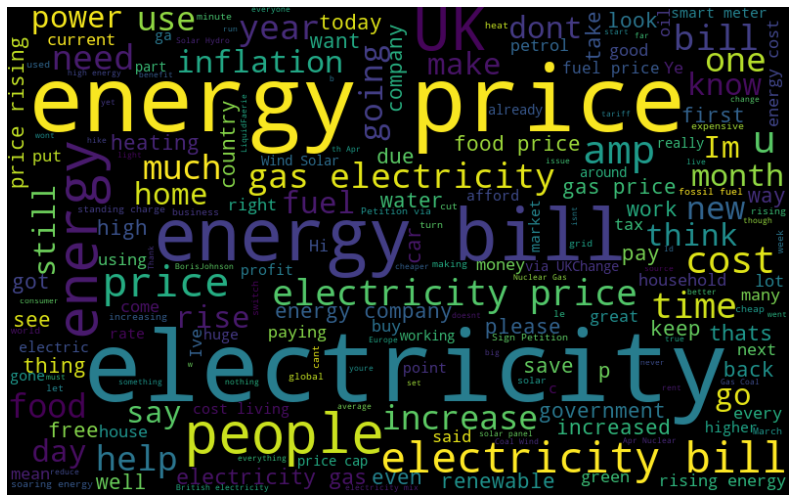

In [14]:
all_words = ' '.join([text for text in uk_sentiments['absolute_tidy_tweets'][uk_sentiments.sentiment == 'pos']])

generate_wordcloud(all_words)

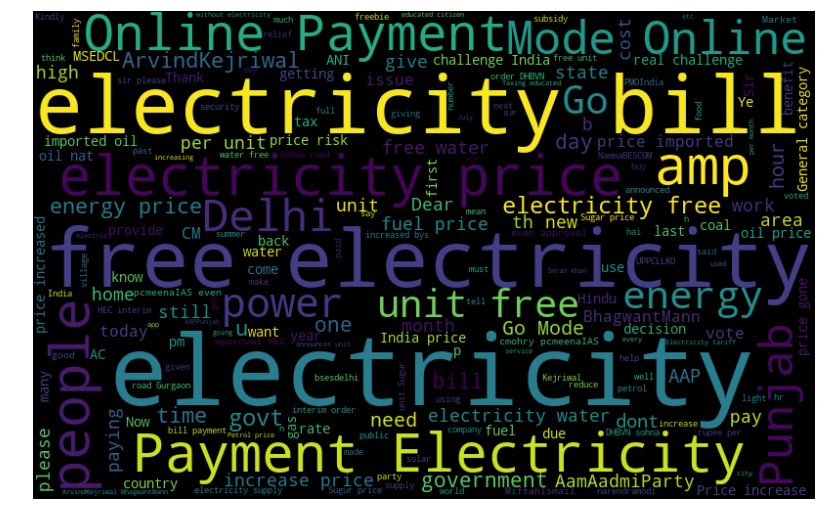

In [40]:
# India tweets postive word wordcloud

all_words = ' '.join([text for text in india_sentiments['absolute_tidy_tweets'][india_sentiments.sentiment == 'pos']])
generate_wordcloud(all_words)

#### <a id='4B'>B. Most common words in negative tweets</a>

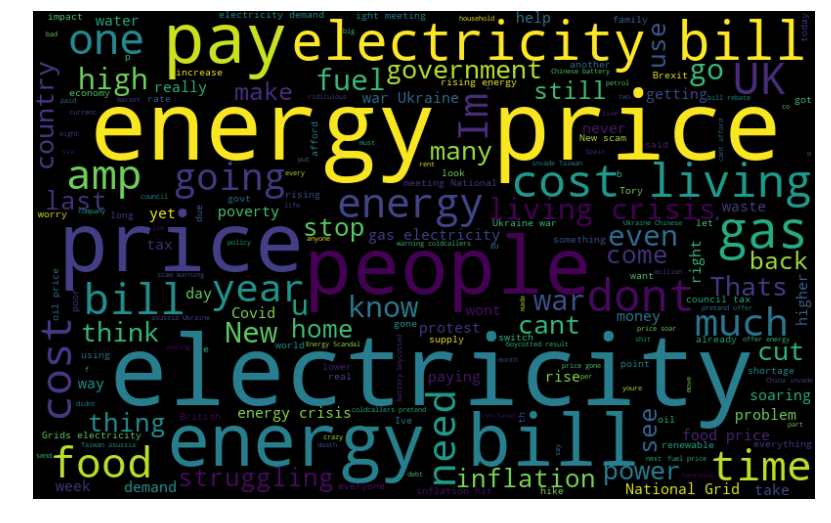

In [41]:
# Uk neagitve tweets words

all_words = ' '.join([text for text in uk_sentiments['absolute_tidy_tweets'][uk_sentiments.sentiment == 'neg']])
generate_wordcloud(all_words)

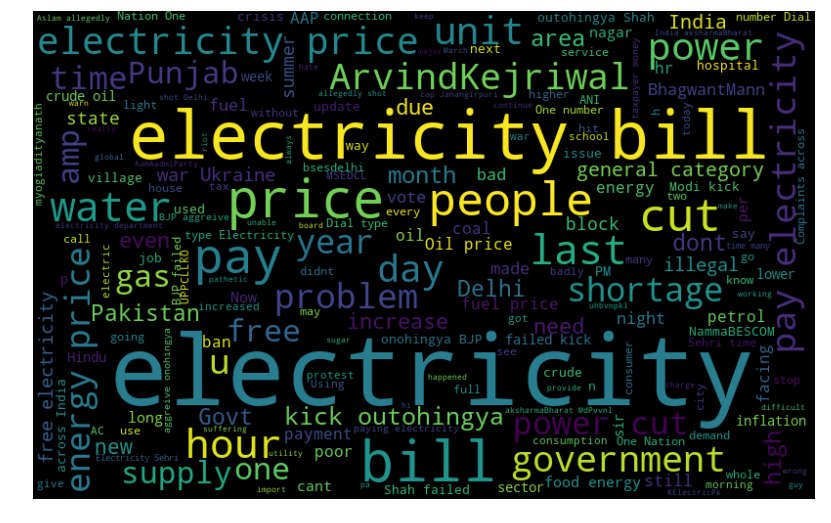

In [42]:
# India negtive tweets word cloud
all_words = ' '.join([text for text in india_sentiments['absolute_tidy_tweets'][india_sentiments.sentiment == 'neg']])
generate_wordcloud(all_words)

### Merging the data frames into one dataset

Uptil now we have preprocess and explore both data frames separetely. Now I have to merge the two data frames into one in order to train the model for sentiment analysis on big generic data set.

In [18]:
# Combing the dataframe to make one dataframe
tweets_df2 = india_sentiments.append(uk_sentiments, ignore_index=True)
tweets_df2.head()

,Unnamed: 0,tweets,tidy_tweets,absolute_tidy_tweets,sentiment
0,0,Again no power...\nFrom 4 hours... @NammaBESCO...,Again no power... From 4 hours... @NammaBESCOM...,Again power From hour NammaBESCOM reachable co...,neg
1,1,@deepakmajipatil @kritinotkeerti Taxes are pai...,@deepakmajipatil @kritinotkeerti Taxes are pai...,deepakmajipatil kritinotkeerti Taxes paid equa...,neg
2,2,Candel light Iftaar thanks to Electricity Dept...,Candel light Iftaar thanks to Electricity Dept,Candel light Iftaar thanks Electricity Dept,pos
3,3,@NammaBESCOM no electricity from past three ho...,@NammaBESCOM no electricity from past three ho...,NammaBESCOM electricity past three hour,pos
4,4,First spend tax payers money on media advertis...,First spend tax payers money on media advertis...,First spend tax payer money medium advertising...,pos


In [19]:
tweets_df2.shape

(8731, 5)

## <a id='5'>5. Feature Extraction</a>

We need to convert textual representation in the form on numeric features. We have one popular technique to perform feature extraction:


1. __TF-IDF (Term Frequency - Inverse Document Frequency)__





### <a id='5A'>A. Feature Extraction for 'Key Words'</a>

In [21]:
# TF-IDF features
tfidf_word_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, stop_words='english')
# TF-IDF feature matrix
tfidf_word_feature = tfidf_word_vectorizer.fit_transform(tweets_df2['absolute_tidy_tweets'].astype('U'))

## <a id='6'>6. Model Building for Sentiment Analysis</a>

Now its time to train the models on the traning data and evaluate them on test dataset.

#### The models are as follows:

- Naive Bayes classifier
- Decision tree classifier
- Random Forest
- Logistic Binary classifier

#### The procedure is as follows:

- Train the models
- Test the models
- Compare the models with ROC curve
- Pick the best performing mode


### Spliting the data into Train and Test dataset

- Train dataset: To train the model which is 70%.
- Test dataset : To evaluate the model which is 30%.

In [ ]:

# Map target variables to  {0, 1}
target_variable = tweets_df2['sentiment'].apply(lambda x: 0 if x=='neg' else 1)

#Using the train_test_split function to split the dataset.
X_train, X_test, y_train, y_test = train_test_split(tfidf_word_feature, target_variable, test_size=0.3, random_state=272)

#### Confusion matrix

The plot_confusion_matrix function is used to create the confusion matrix of all the models.

In [29]:
# Function to evaluate the result of the model in different matrixes
def plot_confusion_matrix(matrix):
    plt.clf()
    plt.imshow(matrix, interpolation='nearest', cmap=plt.cm.Set2_r)
    classNames = ['Positive', 'Negative']
    plt.title('Confusion Matrix')
    plt.ylabel('Predicted')
    plt.xlabel('Actual')
    tick_marks = np.arange(len(classNames))
    plt.xticks(tick_marks, classNames)
    plt.yticks(tick_marks, classNames)
    s = [['TP','FP'], ['FN', 'TN']]

    for i in range(2):
        for j in range(2):
            plt.text(j,i, str(s[i][j])+" = "+str(matrix[i][j]))
    plt.show()

## Training a naive Bayes classifier

In [62]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
classifer = GaussianNB()
# Train model
N_model = classifer.fit(X_train.toarray(),y_train)
N_predict=N_model.predict(X_test.toarray())

### Testing the model
1-Confusion matrix <br>
2-Accuray <br>
3-F1 score <br>
4-Other matrix<br>

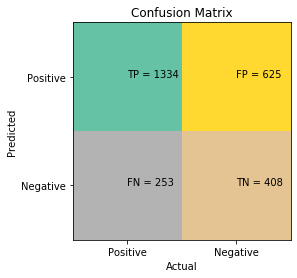

In [63]:
conf_matrix = confusion_matrix(y_test, N_predict, labels=[True, False])
plot_confusion_matrix(conf_matrix)

In [65]:
# outcome values order in sklearn
tp, fn, fp, tn = confusion_matrix(y_test,N_predict,labels=[1,0]).reshape(-1)
print('Outcome values : \n',"\n  True Positive =", tp, "\n  False Negative",fn, "\n  False Positive",fp,"\n  True Negative", tn)

# classification report for precision, recall f1-score and accuracy
matrix = classification_report(y_test,N_predict,labels=[1,0])
print('\nClassification report : \n',matrix)

# Accuracy
print("\n\nThe accuracy of the model is = ", accuracy_score(y_test,N_predict))

Outcome values : 
 
  True Positive = 1334 
  False Negative 625 
  False Positive 253 
  True Negative 408

Classification report : 
               precision    recall  f1-score   support

           1       0.84      0.68      0.75      1959
           0       0.39      0.62      0.48       661

    accuracy                           0.66      2620
   macro avg       0.62      0.65      0.62      2620
weighted avg       0.73      0.66      0.68      2620



The accuracy of the model is =  0.6648854961832061


## Training a Decision Tree Classifier

In [37]:
from sklearn.tree import DecisionTreeClassifier
# Creating the object of the decision tree
decisiontree= DecisionTreeClassifier(random_state=0)
D_model=decisiontree.fit(X_train,y_train)

In [38]:
# Creating the object of the decision tree
decisiontree= DecisionTreeClassifier(random_state=0)
D_model=decisiontree.fit(X_train,y_train)

### Testing the model
1-Confusion matrix <br>
2-Accuray <br>
3-F1 score <br>
4-Other matrix<br>

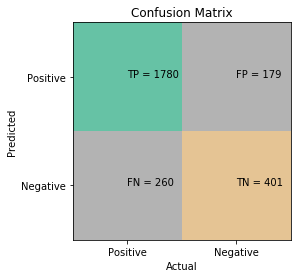

In [55]:
predicted=D_model.predict(X_test)

# confusion matrix
matrix = confusion_matrix(y_test,predicted, labels=[True, False])
plot_confusion_matrix(matrix)


In [40]:
# outcome values order in sklearn
tp, fn, fp, tn = confusion_matrix(y_test,predicted,labels=[1,0]).reshape(-1)
print('Outcome values : \n',"\n  True Positive =", tp, "\n  False Negative",fn, "\n  False Positive",fp,"\n  True Negative", tn)

# classification report for precision, recall f1-score and accuracy
matrix = classification_report(y_test,predicted,labels=[1,0])
print('\nClassification report : \n',matrix)

print("\n\nThe accuracy of the model is = ", accuracy_score(y_test,predicted))

Outcome values : 
 
  True Positive = 1780 
  False Negative 179 
  False Positive 260 
  True Negative 401

Classification report : 
               precision    recall  f1-score   support

           1       0.87      0.91      0.89      1959
           0       0.69      0.61      0.65       661

    accuracy                           0.83      2620
   macro avg       0.78      0.76      0.77      2620
weighted avg       0.83      0.83      0.83      2620



The accuracy of the model is =  0.832442748091603


## Training a Random Forest Classifier

In [41]:
from sklearn.ensemble import RandomForestClassifier

In [42]:
randomforest = RandomForestClassifier(random_state=0, n_jobs=-1)
R_model = randomforest.fit(X_train,y_train)
R_predict=R_model.predict(X_test)

### Testing the model
1-Confusion matrix <br>
2-Accuray <br>
3-F1 score <br>
4-Other matrix<br>

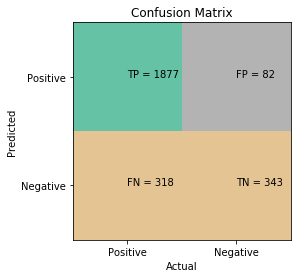

In [57]:
# confusion matrix


matrix = confusion_matrix(y_test,R_predict, labels=[True, False])
plot_confusion_matrix(matrix)


In [44]:
# outcome values order in sklearn
tp, fn, fp, tn = confusion_matrix(y_test,R_predict,labels=[1,0]).reshape(-1)
print('Outcome values : \n',"\n  True Positive =", tp, "\n  False Negative",fn, "\n  False Positive",fp,"\n  True Negative", tn)

# classification report for precision, recall f1-score and accuracy
matrix = classification_report(y_test,R_predict,labels=[1,0])
print('\nClassification report : \n',matrix)

# Accuracy
print("\n\nThe accuracy of the model is = ", accuracy_score(y_test,R_predict))

Outcome values : 
 
  True Positive = 1877 
  False Negative 82 
  False Positive 318 
  True Negative 343

Classification report : 
               precision    recall  f1-score   support

           1       0.86      0.96      0.90      1959
           0       0.81      0.52      0.63       661

    accuracy                           0.85      2620
   macro avg       0.83      0.74      0.77      2620
weighted avg       0.84      0.85      0.84      2620



The accuracy of the model is =  0.8473282442748091


## Training a Logistic Binary Classifier

In [45]:
from sklearn.linear_model import LogisticRegression

# Create logistic regression object
logistic_regression = LogisticRegression(random_state=0)
# Train model
L_model = logistic_regression.fit(X_train,y_train)
L_predict=L_model.predict(X_test)

### Testing the model
1-Confusion matrix <br>
2-Accuray <br>
3-F1 score <br>
4-Other matrix<br>

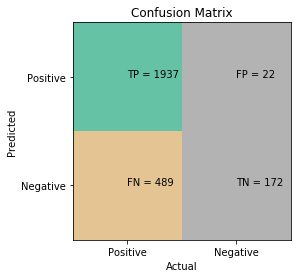

In [58]:
# confusion matrix
matrix = confusion_matrix(y_test,L_predict, labels=[True, False])
plot_confusion_matrix(matrix)


In [60]:
# outcome values order in sklearn
tp, fn, fp, tn = confusion_matrix(y_test,L_predict,labels=[1,0]).reshape(-1)
print('Outcome values : \n',"\n  True Positive =", tp, "\n  False Negative",fn, "\n  False Positive",fp,"\n  True Negative", tn)

# classification report for precision, recall f1-score and accuracy
matrix = classification_report(y_test,L_predict,labels=[1,0])
print('\nClassification report : \n',matrix)

# Accuracy
print("\n\nThe accuracy of the model is = ", accuracy_score(y_test,L_predict))

Outcome values : 
 
  True Positive = 1937 
  False Negative 22 
  False Positive 489 
  True Negative 172

Classification report : 
               precision    recall  f1-score   support

           1       0.80      0.99      0.88      1959
           0       0.89      0.26      0.40       661

    accuracy                           0.80      2620
   macro avg       0.84      0.62      0.64      2620
weighted avg       0.82      0.80      0.76      2620



The accuracy of the model is =  0.8049618320610687


### ROC CURVE OF ALL THE MODELS 

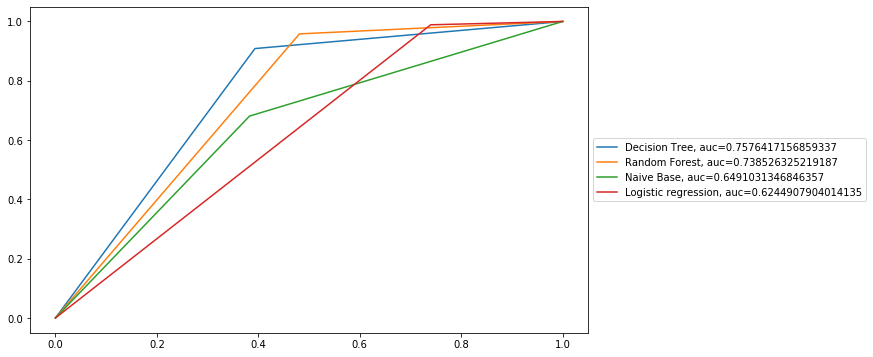

In [66]:
from sklearn import metrics

c=plt.figure()
c.set_figwidth(10)
c.set_figheight(6)

fpr, tpr, thresh = metrics.roc_curve(y_test, predicted)
auc = metrics.roc_auc_score(y_test, predicted)
plt.plot(fpr,tpr,label="Decision Tree, auc="+str(auc))

fpr, tpr, thresh = metrics.roc_curve(y_test,R_predict )
auc = metrics.roc_auc_score(y_test, R_predict)
plt.plot(fpr,tpr,label="Random Forest, auc="+str(auc))

fpr, tpr, thresh = metrics.roc_curve(y_test, N_predict)
auc = metrics.roc_auc_score(y_test, N_predict)
plt.plot(fpr,tpr,label="Naive Base, auc="+str(auc))

fpr, tpr, thresh = metrics.roc_curve(y_test, L_predict)
auc = metrics.roc_auc_score(y_test, L_predict)
plt.plot(fpr,tpr,label="Logistic regression, auc="+str(auc))



plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

### The result's Conculsion

After comparing all 4 model with the help of Roc curve, we have found that is the Decision Tree is performing better than all other three models. There is slight differnce between the performance of Decision Tree and Random Forest. So, we can choose the Decision Tree or Random Forest for the deployment.

### Future improvements

- Gather more dataset
- Use K-fold techniques for training the model
- Use Hyperparameters for models optimizations.



